Base on  [BobaZooba hw](https://github.com/BobaZooba/DeepNLP/blob/2020/Week%203/Homework%202.ipynb)

In [1]:
!pip install data

  Preparing metadata (setup.py) ... done
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=8c21bf1229a1b89823c92cbe07835fbb58c6267e1aea614c94794adc9b1b7fa0
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
Successfully built data


In [2]:
!ls /content/

data.py  sample_data


In [3]:
import math
import numpy as np

from tqdm import tqdm

import torch

import zipfile

import seaborn as sns

from data import Downloader, Parser

### Loading the file with embeddings for English
We will need them a little later.

For other languages: https://fasttext.cc/docs/en/crawl-vectors.html

In [4]:
# uncomment and download
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2024-10-28 20:34:24--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.51, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   221MB/s    in 2.9s    

2024-10-28 20:34:27 (221 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [5]:
# path to data
data_path = './data/'

### Data reader
No need to go into details, this thing just downloads data, then parses it and makes three datasets from it:
- training
- validation
- unlabeled

Unlabeled data is not essential, but you may need it, for example, for a language model or to improve embeddings.

In [6]:
downloader = Downloader(data_path=data_path)

In [7]:
downloader.run()

multiple: 100%|██████████| 17/17 [00:10<00:00,  1.63it/s]


In [8]:
parser = Parser(data_path=data_path)

In [9]:
unlabeled, train, valid = parser.run()

Reading: 100%|██████████| 38/38 [02:44<00:00,  4.33s/it]


### Let's look at the datasets

In [10]:
unlabeled

,question,response
0,"good night, can you please tell me the...",it depends of your carrier band. please consul...
1,will this rod fit a penn senator 115 l2 size 9...,i use both the 9/0 (115) and a 12/0 on this ro...
2,"at the product information, item weight is 30....","it did seem heavier when it was in the box, bu..."
3,what's the measurement from the rear of the sc...,the place where the rear ring mounts is approx...
4,will this work on co2 air guns?,yes works great on alot of thing leather too b...
...,...,...
137275,how do you determine the width of the wheel to...,typically your wheel size will be smaller than...
137276,does it twist for forward and reverse or requi...,twist like a normal throttle. does not have re...
137277,will this fit the mk3 hunter version? its a 6....,"yes, that's what i have. it has very hard fini..."
137278,what exactly are the dimensions of the top pou...,depends. personal pan pizza: yes. large super ...


In [11]:
train

,question,response,category
0,i'm from oklahoma and my order for this item w...,i am from indianapolis and i had my order canc...,sports and outdoors
1,does it come in a plastic or glass bottle?,glass,grocery and gourmet food
2,do you need to set up with pc & disk before us...,no its you paired to my note3 and ipad no worr...,cell phones and accessories
3,how long is the table?,approx. 24-30 inches. it is so nice and sturdy...,beauty
4,how hot does the temperature get?,it gets to 400 which is perfect for how course...,beauty
...,...,...,...
249995,do these come with nipples?,yes 6 bottles 6 nipples 6 bottle caps. no extr...,baby
249996,"is this a ""beach"" volleyball? (softer/differen...",it might be a little softer not really l sure ...,sports and outdoors
249997,does the icon hd have caller id functionality?...,no. it will say the phone number but not the c...,cell phones and accessories
249998,is it safe to sleep next to this battery in a ...,i would say yes since it suffers poor cell con...,automotive


In [12]:
valid

,question,response,category
0,"hi, this can fit in a spinning bycicle? can he...",if you can fit it on your spin bike it would p...,sports and outdoors
1,is there a way to take pictures throgh this sc...,an adapter is available for some cameras. you ...,sports and outdoors
2,will this fit the iphone 5 with defender otter...,"yes, this pouch for the iphone 5 with an otter...",sports and outdoors
3,im confused do you get 1 or 3?,you get one. i just purchased three different...,pet supplies
4,how many qc465a disc pads in a package,4 2 left front 2 right front everything you ne...,automotive
...,...,...,...
49995,can you strip it bare? i dont need that stuff ...,"yes, most of the pieces are removable",sports and outdoors
49996,are these phones unlocked,this is such an old phone you should buy a new...,cell phones and accessories
49997,does this mirror fit a 2004 jetta? amazon says...,it fit my 2004 passat wagon... so there is a v...,automotive
49998,does it come with a charger if not what type d...,garbage phone do not buy... lasted less then 2...,cell phones and accessories


## Task
Classify the question field into one of the categories in the category field.

This is data from the Amazon QA service, that is, a service where you can ask a question and get an answer from other users.

The idea of ​​the task is the following: let's help the client determine which category to post his question to in order to quickly get the most relevant answer.

### Converting a class into an index
We will code some mapper that converts the class text into a specific unique index. We need this because our model does not work directly with the class, but with its index.

In [13]:
# checking that the train and the validation datasets contain the same categories
set(train.category.unique().tolist()) == set(valid.category.unique().tolist())

True

In [14]:
unique_categories = set(train.category.unique().tolist() + valid.category.unique().tolist())

In [15]:
category2index = {category: index for index, category in enumerate(unique_categories)}

In [16]:
category2index

{'cell phones and accessories': 0,
 'baby': 1,
 'pet supplies': 2,
 'office products': 3,
 'sports and outdoors': 4,
 'grocery and gourmet food': 5,
 'automotive': 6,
 'beauty': 7}

In [17]:
train['target'] = train.category.map(category2index)
valid['target'] = valid.category.map(category2index)

In [18]:
train

,question,response,category,target
0,i'm from oklahoma and my order for this item w...,i am from indianapolis and i had my order canc...,sports and outdoors,4
1,does it come in a plastic or glass bottle?,glass,grocery and gourmet food,5
2,do you need to set up with pc & disk before us...,no its you paired to my note3 and ipad no worr...,cell phones and accessories,0
3,how long is the table?,approx. 24-30 inches. it is so nice and sturdy...,beauty,7
4,how hot does the temperature get?,it gets to 400 which is perfect for how course...,beauty,7
...,...,...,...,...
249995,do these come with nipples?,yes 6 bottles 6 nipples 6 bottle caps. no extr...,baby,1
249996,"is this a ""beach"" volleyball? (softer/differen...",it might be a little softer not really l sure ...,sports and outdoors,4
249997,does the icon hd have caller id functionality?...,no. it will say the phone number but not the c...,cell phones and accessories,0
249998,is it safe to sleep next to this battery in a ...,i would say yes since it suffers poor cell con...,automotive,6


### Torch Dataset, DataLoader

This is a very important abstraction for Torch.

We will always use it to work with data.

`Dataset` is a class that you need to inherit from to write your own data handler. Inside it, you need to implement two methods,
which will be discussed below. That is, in this class you describe how to convert your data into a Torch format (converting texts
into word indexes, etc.).

`DataLoader` is a class that will sample data in batches for you. It is an iterator, so the format for working with it is approximately as follows:
```python
for batch in data_loader:
    ...
```
That is, at each iteration, one batch of data is given. Iteration ends when you go through all the batches.

Why do we need these abstractions? To simplify and unify our work with data.
In general, you can implement something of your own, but this is a simplification of this task.

In [19]:
from torch.utils.data import Dataset, DataLoader

In [20]:
# toy dataset
# 121535 examples, 4 features, 3 classes
some_data_x = np.random.rand(121535, 4)
some_data_y = np.random.randint(3, size=(121535,))

In [21]:
# just random numbers
some_data_x[:10]

array([[0.10826148, 0.74905625, 0.69051137, 0.74663292],
       [0.88131665, 0.99109972, 0.47582262, 0.10940967],
       [0.38886955, 0.6155447 , 0.04103358, 0.82278828],
       [0.02651368, 0.81672301, 0.61612131, 0.54255619],
       [0.31139615, 0.46550815, 0.81199428, 0.43881489],
       [0.04066398, 0.09026044, 0.84737455, 0.72393167],
       [0.29600086, 0.99393449, 0.92859291, 0.27586581],
       [0.05382624, 0.95222062, 0.76237021, 0.97057495],
       [0.87450681, 0.73438612, 0.51811821, 0.21040633],
       [0.43586744, 0.48667785, 0.67690395, 0.82947854]])

In [22]:
# and classes
some_data_y

array([0, 1, 2, ..., 2, 2, 1])

### Example of usefulness
To train a model, you need to feed it batches of data. How could we implement this if we didn't have Dataset and DataLoader

In [23]:
batch_size = 16

for i_batch in range(math.ceil(some_data_x.shape[0] / batch_size)):

    x_batch = some_data_x[i_batch * batch_size:(i_batch + 1) * batch_size]
    y_batch = some_data_y[i_batch * batch_size:(i_batch + 1) * batch_size]

    x_batch = torch.tensor(x_batch)
    y_batch = torch.tensor(y_batch)

    break

In [24]:
x_batch

tensor([[0.1083, 0.7491, 0.6905, 0.7466],
        [0.8813, 0.9911, 0.4758, 0.1094],
        [0.3889, 0.6155, 0.0410, 0.8228],
        [0.0265, 0.8167, 0.6161, 0.5426],
        [0.3114, 0.4655, 0.8120, 0.4388],
        [0.0407, 0.0903, 0.8474, 0.7239],
        [0.2960, 0.9939, 0.9286, 0.2759],
        [0.0538, 0.9522, 0.7624, 0.9706],
        [0.8745, 0.7344, 0.5181, 0.2104],
        [0.4359, 0.4867, 0.6769, 0.8295],
        [0.5901, 0.7672, 0.4601, 0.3265],
        [0.3960, 0.2538, 0.1275, 0.1798],
        [0.5884, 0.9556, 0.3790, 0.5072],
        [0.0628, 0.0925, 0.5440, 0.8636],
        [0.8550, 0.0844, 0.3197, 0.7426],
        [0.8654, 0.0582, 0.8261, 0.3383]], dtype=torch.float64)

In [25]:
x_batch.shape, y_batch.shape

(torch.Size([16, 4]), torch.Size([16]))

This is a fairly simple example. We were able to do it ourselves, but almost always, processing the data to feed it into a model is more complicated.
And some things are often needed more than once, for example, if we want to shuffle our data every epoch to get different batches.
We can do this, but to do so, we will have to drag some code with us from project to project. Also, co-development or simply reading someone else's code is much easier when you use unified formats.

### Moving on to Dataset
Let's wrap our data in this handler.

In [26]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # it is very necessary to define this function
        # it should return the size of the dataset
        # it is needed for DataLoader to sample batches

        return len(self.data_x)

    def __getitem__(self, idx):

        # this method needs to be defined as well
        # that is, how we will get our data by index

        return self.data_x[idx], self.data_y[idx]

In [27]:
some_dataset = ToyDataset(some_data_x, some_data_y)

In [28]:
some_dataset[5], some_dataset[467]

((array([0.04066398, 0.09026044, 0.84737455, 0.72393167]), 0),
 (array([0.58986084, 0.78083653, 0.54846728, 0.22804896]), 2))

### It seems like it doesn't make sense, but this is the simplest example.

### DataLoader
We can set some parameters in it, for example, batch size and whether it is necessary to shuffle data in every pass to get different batches (to compose these batches differently).

In [29]:
some_loader = DataLoader(some_dataset, batch_size=16, shuffle=True)

In [30]:
for x, y in some_loader:
    break

x

tensor([[0.3473, 0.9123, 0.2475, 0.3541],
        [0.8745, 0.5564, 0.4291, 0.9403],
        [0.8750, 0.1157, 0.0141, 0.9137],
        [0.7860, 0.4919, 0.8156, 0.2189],
        [0.9852, 0.0651, 0.8616, 0.4249],
        [0.6668, 0.0428, 0.1558, 0.3059],
        [0.9445, 0.1502, 0.1467, 0.8571],
        [0.6461, 0.4544, 0.8219, 0.2054],
        [0.1662, 0.5794, 0.5729, 0.2499],
        [0.1170, 0.8047, 0.4761, 0.4456],
        [0.9124, 0.4481, 0.9641, 0.6797],
        [0.8522, 0.8528, 0.7089, 0.4681],
        [0.4503, 0.9419, 0.2076, 0.9522],
        [0.1549, 0.3382, 0.9066, 0.3761],
        [0.1624, 0.8979, 0.1937, 0.9973],
        [0.9324, 0.2060, 0.9983, 0.3397]], dtype=torch.float64)

In [31]:
x.shape

torch.Size([16, 4])

In [32]:
for x, y in some_loader:
    pass

len(x)

15

In [33]:
# why 15?
# because the amount of our data is not divisible by 16
# and therefore the last batch is less than 16
len(some_dataset) % 16

15

### Let's complicate the handler

In [34]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # it is very necessary to define this function
        # it should return the size of the dataset
        # it is needed for DataLoader to sample batches

        return len(self.data_x)

    @staticmethod
    def pow_features(x, n=2):

        return x ** n

    @staticmethod
    def log_features(x):

        return np.log(x)

    def __getitem__(self, idx):

        # this method needs to be defined as well
        # that is, how we will get our data by index

        x = self.data_x[idx]

        # inside the dataset we can do whatever we want with our data
        # for example, to define functions that add power features
        x_p_2 = self.pow_features(x, n=2)
        x_p_3 = self.pow_features(x, n=3)
        # and let's also add logarithmic features
        x_log = self.log_features(x)

        # let's concatenate our features
        x = np.concatenate([x, x_p_2, x_p_3, x_log])

        y = self.data_y[idx]

        return x, y

In [35]:
toy_dataset = ToyDataset(some_data_x, some_data_y)

In [36]:
toy_loader = DataLoader(dataset=toy_dataset, batch_size=128)

In [37]:
for x, y in toy_loader:
    break

In [38]:

x.shape

torch.Size([128, 16])

In [39]:
# note that we immediately get the torch data format, which is obtained from the automatic conversion from numpy
x

tensor([[ 0.1083,  0.7491,  0.6905,  ..., -0.2889, -0.3703, -0.2922],
        [ 0.8813,  0.9911,  0.4758,  ..., -0.0089, -0.7427, -2.2127],
        [ 0.3889,  0.6155,  0.0410,  ..., -0.4852, -3.1934, -0.1951],
        ...,
        [ 0.4078,  0.1684,  0.7213,  ..., -1.7812, -0.3267, -0.9119],
        [ 0.2514,  0.3126,  0.1775,  ..., -1.1628, -1.7290, -2.5648],
        [ 0.6614,  0.6543,  0.7776,  ..., -0.4241, -0.2515, -0.6932]],
       dtype=torch.float64)

In [40]:
y

tensor([0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2,
        2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0,
        0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1,
        1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2,
        2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1,
        2, 1, 2, 0, 2, 2, 0, 0])

In [41]:
# let's create a small model and calculate the loss

model = torch.nn.Sequential(torch.nn.Linear(16, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3))

criterion = torch.nn.CrossEntropyLoss()

with torch.no_grad():

    prediction = model(x.float())

    loss = criterion(prediction, y)

loss.item()

1.0999910831451416

### Let's create a dataset for our text data
We will input a string and a target by index

In [42]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets):
        super().__init__()

        self.texts = texts
        self.targets = targets

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        return text, target

In [43]:
# preparing the data
train_x = list(train.question)
train_y = list(train.target)

valid_x = list(valid.question)
valid_y = list(valid.target)

In [44]:
train_dataset = TextClassificationDataset(texts=list(train.question), targets=list(train.target))

In [45]:
# sampling the data
text, target = train_dataset[0]

In [46]:
text

"i'm from oklahoma and my order for this item was cancelled because it contains hazardous material and couldn't be shipped to my address. i don't understand what hazardous material amazon is referring to?"

In [47]:
target

4

### The point of the handler
It is that we need to transform our data into a format that we can then pass to the model.
Right now we have strings, and Torch doesn't know anything about strings, it needs tensors.

### Loading Embeddings
To work with text data, we can split our lines into words, and convert the words into vectors. Where do we get these vectors?
We talked about a method called word2vec and at the beginning of this notebook we loaded a file with these very vectors.


In [48]:
import zipfile
import numpy as np

from tqdm import tqdm

In [49]:
def load_embeddings(zip_path, filename, pad_token='PAD', max_words=100_000, verbose=True):

    vocab = dict()
    embeddings = list()

    with zipfile.ZipFile(zip_path) as zipped_file:
        with zipped_file.open(filename) as file_object:

            vocab_size, embedding_dim = file_object.readline().decode('utf-8').strip().split()

            vocab_size = int(vocab_size)
            embedding_dim = int(embedding_dim)

            # there are 1,000,000 words with vectors in the file, let's limit this dictionary for simplicity
            max_words = vocab_size if max_words <= 0 else max_words

            # let's add the pad token and embedding to our embedding matrix and dictionary
            vocab[pad_token] = len(vocab)
            embeddings.append(np.zeros(embedding_dim))

            progress_bar = tqdm(total=max_words, disable=not verbose)

            for line in file_object:
                parts = line.decode('utf-8').strip().split()

                token = ' '.join(parts[:-embedding_dim]).lower()

                if token in vocab:
                    continue

                word_vector = np.array(list(map(float, parts[-embedding_dim:])))

                vocab[token] = len(vocab)
                embeddings.append(word_vector)

                progress_bar.update()

                if len(vocab) == max_words:
                    break

            progress_bar.close()

    embeddings = np.stack(embeddings)

    return vocab, embeddings

In [50]:
vocab, embeddings = load_embeddings('./wiki-news-300d-1M.vec.zip', 'wiki-news-300d-1M.vec', max_words=100_000)

100%|█████████▉| 99999/100000 [00:11<00:00, 8991.10it/s]


### Let's look at the word's closest neighbors by embeddings

In [51]:
index2token = {index: token for token, index in vocab.items()}

In [52]:
emb_norms = np.linalg.norm(embeddings, axis=1)

In [53]:
def get_k_nearest_neighbors(word, embeddings, emb_norms, vocab, index2token, k=5):

    if word not in vocab:
        print('Not in vocab')
        return

    word_index = vocab[word]

    word_vector = embeddings[word_index]
    word_vector = np.expand_dims(word_vector, 0)

    scores = (word_vector @ embeddings.T)[0]

    # convert to cosines, dividing by vector norms
    # epsilon 1e-6 so as not to divide by 0
    scores = scores / (emb_norms + 1e-6) / emb_norms[word_index]

    # 1:k+1 because 0-indexed element is the word itself
    for idx in scores.argsort()[::-1][1:k+1]:
        print(f'The word {index2token[idx]} is similar by {scores[idx]:.2f} to the word {word}')

In [54]:
get_k_nearest_neighbors('anna', embeddings, emb_norms, vocab, index2token)

The word maria is similar by 0.73 to the word anna
The word emma is similar by 0.66 to the word anna
The word kristina is similar by 0.65 to the word anna
The word laura is similar by 0.65 to the word anna
The word emily is similar by 0.65 to the word anna


In [55]:
get_k_nearest_neighbors('mom', embeddings, emb_norms, vocab, index2token)

The word dad is similar by 0.85 to the word mom
The word mum is similar by 0.78 to the word mom
The word mother is similar by 0.76 to the word mom
The word moms is similar by 0.75 to the word mom
The word kid is similar by 0.68 to the word mom


In [56]:
get_k_nearest_neighbors('have', embeddings, emb_norms, vocab, index2token)

The word has is similar by 0.78 to the word have
The word been is similar by 0.75 to the word have
The word 've is similar by 0.75 to the word have
The word had is similar by 0.74 to the word have
The word ahve is similar by 0.74 to the word have


In [57]:
get_k_nearest_neighbors('money', embeddings, emb_norms, vocab, index2token)

The word cash is similar by 0.72 to the word money
The word funds is similar by 0.72 to the word money
The word monies is similar by 0.72 to the word money
The word moneys is similar by 0.67 to the word money
The word dosh is similar by 0.63 to the word money


In [58]:
get_k_nearest_neighbors('music', embeddings, emb_norms, vocab, index2token)

The word musical is similar by 0.71 to the word music
The word songs is similar by 0.69 to the word music
The word tunes is similar by 0.69 to the word music
The word musics is similar by 0.68 to the word music
The word composer is similar by 0.68 to the word music


### Choosing a tokenization method
We now have a mapping that a certain word corresponds to a certain embedding of this word.
Tokenization is the process of dividing a text into tokens, that is, parts of this text.
How a "word" differs from a "token": a token is a more generalized concept, that is, for example, a number is a token

In [59]:
# More details about the differences can be found, for example, here
# https://stackoverflow.com/questions/50240029/nltk-wordpunct-tokenize-vs-word-tokenize
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [60]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # tokenization by space
    tokens = sample.split()

    for tok in tokens:
        # checking if the token is in our dictionary
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'We don not know {len(unknown_words)} words out of {total_n_words} words in the dataset')
print(f'Which is {len(unknown_words) * 100 / total_n_words:.2f}% of the dataset')
print()
print(f'Unique unknown words: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:01<00:00, 193707.20it/s]

We don not know 511875 words out of 3604659 words in the dataset
Which is 14.20% of the dataset

Unique unknown words: 119045


In [61]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # tokenization
    tokens = wordpunct_tokenize(sample)

    for tok in tokens:
        # checking if the token is in our dictionary
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'we don not know {len(unknown_words)} words out of {total_n_words} words in the dataset')
print(f'Which is {len(unknown_words) * 100 / total_n_words:.2f}% of the dataset')
print()
print(f'Unique unknown words: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:02<00:00, 97931.39it/s]

we don not know 110523 words out of 4200673 words in the dataset
Which is 2.63% of the dataset

Unique unknown words: 36103


In [62]:
# total_n_words = 0
# unknown_words = list()

# for sample in tqdm(train_x):
#     # tokenization
#     tokens = word_tokenize(sample)

#     for tok in tokens:
#         # checking if the token is in our dictionary
#         if tok not in vocab:
#             unknown_words.append(tok)

#         total_n_words += 1

# print(f'we don not know {len(unknown_words)} words out of {total_n_words} words in the dataset')
# print(f'Which is {len(unknown_words) * 100 / total_n_words:.2f}% of the dataset')
# print()
# print(f'Unique unknown words: {len(set(unknown_words))}')

### Results
- The speed of word_tokenize is much lower than that of wordpunct_tokenize
- Using word_tokenize, we lose about 1% of the information from the dataset compared to wordpunct_tokenize

### The choice is obvious in favor of wordpunct_tokenize

In [63]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets, vocab):
        super().__init__()

        self.texts = texts
        self.targets = targets
        self.vocab = vocab

    def __len__(self):
        return len(self.texts)

    def tokenization(self, text):

        tokens = wordpunct_tokenize(text)

        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]

        return token_indices

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        tokenized_text = self.tokenization(text)

        # let's translate our token indices into a Torch tensor
        # the target will convert itself
        tokenized_text = torch.tensor(tokenized_text)

        return tokenized_text, target

In [64]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [65]:
x, y = train_dataset[5]

In [66]:
x

tensor([   14,    29,   160, 29415,  4473,    37,  1569, 18399,    31,     7,
        51329,  1959,    37])

In [67]:
y

6

In [68]:
# we can restore the text back by word indexes
[index2token[idx.item()] for idx in x]

['is',
 'this',
 '11',
 'mil',
 'thick',
 '?',
 '45',
 'lb',
 '/',
 'in',
 'tensile',
 'strength',
 '?']

### У нас остается проблема разных длин текстов
Чтобы поместить батч текстов в один тензор нам нужны одинаковые длины

In [69]:
## this won't work, you can uncomment and check

# x = [
#     [1, 2, 3],
#     [1, 2, 3, 4, 5],
#     [1, 2, 3, 4, 5, 6, 7]
# ]

# torch.tensor(x), torch.tensor(x).shape

In [70]:
# this will work

x = [
    [1, 2, 3, 0, 0, 0, 0],
    [1, 2, 3, 4, 5, 0, 0],
    [1, 2, 3, 4, 5, 6, 7]
]

torch.tensor(x), torch.tensor(x).shape

(tensor([[1, 2, 3, 0, 0, 0, 0],
         [1, 2, 3, 4, 5, 0, 0],
         [1, 2, 3, 4, 5, 6, 7]]),
 torch.Size([3, 7]))

### Text length
We need to understand to what length we should pad each of our examples.
We can find the maximum length of an example in tokens in our data and pad to this length, but this approach has a downside:
we may have several texts with an abnormally large length, that is, some outliers.

In this case, it is easier for us to limit the length of these texts to a certain statistic for our dataset. For example, 95% of our texts
have a length of 25 words and this is enough for us. That is, we will limit the texts to this length, because almost the entire dataset fits within this length and we will not need to pad to a large length.

We need padding so that we can place different examples in one batch, but we do not want to take these tokens into account. In fact, these will be idle runs and due to this compromise that most of the dataset is no more than n words and we can optimize our training.

<br>


> Why don't we just throw away these long texts?

The point is that we want to come to some compromise between the maximum length and the loss of information. If we take the 95th percentile of our lengths (that is, 95% of our texts are no larger than n), then throwing away the remaining 5%, we will lose a significant part of the examples.
On the other hand, it may seem wrong to limit the length and this can really break the meaning of the examples, but this is often neglected.

In [71]:
train_lengths = [len(wordpunct_tokenize(sample)) for sample in tqdm(train_x)]

100%|██████████| 250000/250000 [00:02<00:00, 96099.22it/s]


<ipython-input-72-6fda2ba84acf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_lengths)


<Axes: ylabel='Density'>

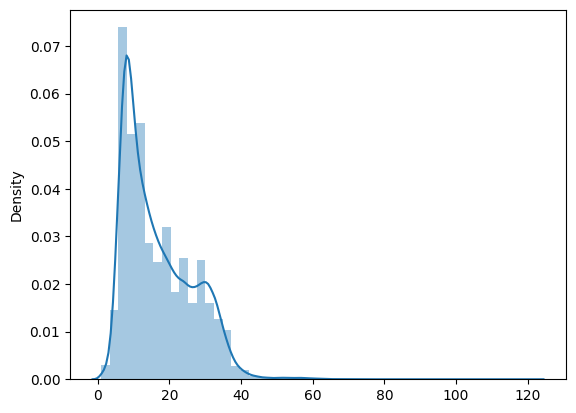

In [72]:
sns.distplot(train_lengths)

In [73]:
# we see large outliers in the data
# 97% of our texts are no more than this many tokens
np.percentile(train_lengths, 95)

34.0

In [74]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets, vocab, pad_index=0, max_length=32):
        super().__init__()

        self.texts = texts
        self.targets = targets
        self.vocab = vocab

        self.pad_index = pad_index
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def tokenization(self, text):

        tokens = wordpunct_tokenize(text)

        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]

        return token_indices

    def padding(self, tokenized_text):

        tokenized_text = tokenized_text[:self.max_length]

        tokenized_text += [self.pad_index] * (self.max_length - len(tokenized_text))

        return tokenized_text

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        tokenized_text = self.tokenization(text)
        tokenized_text = self.padding(tokenized_text)

        tokenized_text = torch.tensor(tokenized_text)

        return tokenized_text, target

In [75]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [76]:
x, y = train_dataset[0]
x

tensor([   28,    23,  1750,    26,  3397,     4,    92,   537,    15,    29,
         2649,    22,  6538,    96,    20,  1560,  9551,   358,     4,  4937,
           23,   535,    38, 10223,     6,    92,   547,     3,    28,   422,
           23,   535])

In [77]:
[index2token[idx.item()] for idx in x]

['i',
 "'",
 'm',
 'from',
 'oklahoma',
 'and',
 'my',
 'order',
 'for',
 'this',
 'item',
 'was',
 'cancelled',
 'because',
 'it',
 'contains',
 'hazardous',
 'material',
 'and',
 'couldn',
 "'",
 't',
 'be',
 'shipped',
 'to',
 'my',
 'address',
 '.',
 'i',
 'don',
 "'",
 't']

In [78]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)
valid_dataset = TextClassificationDataset(texts=valid_x, targets=valid_y, vocab=vocab)

train_loader = DataLoader(train_dataset, batch_size=128)
valid_loader = DataLoader(valid_dataset, batch_size=128)

In [79]:
for x, y in train_loader:
    break

In [80]:
x.shape, y.shape

(torch.Size([128, 32]), torch.Size([128]))

### How can we define layers?

In [81]:
from torch import nn

In [82]:
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=embeddings.shape[-1],
                               padding_idx=0)

In [83]:
x_embed = embedding_layer(x)

In [84]:
x_embed

tensor([[[ 0.2727, -1.6305, -1.5280,  ...,  0.3448, -0.0045,  0.8920],
         [ 0.5038,  1.1626,  1.0767,  ...,  0.7714,  1.3850,  1.1074],
         [ 0.6327,  0.0833, -1.8820,  ..., -1.7380, -1.2971,  0.7890],
         ...,
         [-0.5437,  0.1790, -1.3968,  ...,  0.8833, -0.7848, -1.2462],
         [ 0.5038,  1.1626,  1.0767,  ...,  0.7714,  1.3850,  1.1074],
         [ 1.8540, -0.9828, -0.7065,  ..., -0.6236, -1.2338,  1.2042]],

        [[-0.0259, -1.0343,  0.0547,  ...,  0.0246, -0.6475,  1.5948],
         [-1.1186,  1.4200,  1.7940,  ..., -0.4780,  1.7623,  0.1413],
         [ 0.5409,  0.2362, -0.1928,  ..., -1.7078, -1.3657,  0.9262],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.4983, -0.1603, -0.2844,  ..., -0.2090,  0.1391,  0.7631],
         [-0.0127, -1.3903, -0.9583,  ...,  0

In [85]:
x_embed.shape

torch.Size([128, 32, 300])

### But we have read our embedding matrix
Thus, it is initialized with pretrained weights.
With such initialization, by default it is frozen, inside ```.from_pretrained(embeddings, padding_idx=0)``` there is a flag ```freeze```, which is responsible for freezing the weights if necessity. That is, these weights will not be updated during the training process.

In [86]:
embeddings = torch.tensor(embeddings).float()

In [87]:
embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)

In [88]:
x_embed = embedding_layer(x)

### A bit of LSTM
Below will be about ```batch_first=True```

In [89]:
lstm = nn.LSTM(input_size=300, hidden_size=128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)

In [90]:
x_lstm, _ = lstm(x_embed)

In [91]:
# 256 because it is a concatenation of the LSTM that read the text from left to right
# and the LSTM that read the text from right to left
x_lstm.shape

torch.Size([128, 32, 256])

In [92]:
# got rid of the time dimension
x_lstm.mean(dim=1).shape

torch.Size([128, 256])

### Let's create our own network
There is more detailed information about why we use classes at the end of the the first homework.

In [93]:
class DeepAverageNetwork(nn.Module):

    def __init__(self, embeddings, linear_1_size, linear_2_size, n_classes):
        super().__init__()

        self.embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)

        self.batch_norm = nn.BatchNorm1d(num_features=embeddings.shape[-1])

        self.linear_1 = nn.Linear(in_features=embeddings.shape[-1], out_features=linear_1_size)
        self.linear_2 = nn.Linear(in_features=linear_1_size, out_features=linear_2_size)
        self.linear_3 = nn.Linear(in_features=linear_2_size, out_features=n_classes)

    def forward(self, x):

        # translating word indices into embeddings of these words
        # (batch_size, sequence_length) -> (batch_size, sequence_length, embedding_dim)
        x = self.embedding_layer(x)

        # aggregating our embeddings by time dimension
        # (batch_size, sequence_length, embedding_dim) -> (batch_size, embedding_dim)
        x = x.sum(dim=1)

        # normalization
        # (batch_size, embedding_dim) -> (batch_size, embedding_dim)
        x = self.batch_norm(x)

        # passing through the first linear layer
        # (batch_size, embedding_dim) -> (batch_size, linear_1_size)
        x = self.linear_1(x)

        # applying nonlinearity
        # (batch_size, linear_1_size) -> (batch_size, linear_1_size)
        x = torch.relu(x)

        # passing through the second linear layer
        # (batch_size, linear_1_size) -> (batch_size, linear_2_size)
        x = self.linear_2(x)

        # applying nonlinearity
        # (batch_size, linear_2_size) -> (batch_size, linear_2_size)
        x = torch.relu(x)

        # converting into the number of classes using a linear transformation
        # (batch_size, linear_2_size) -> (batch_size, n_classes)
        x = self.linear_3(x)

        ## in theory there should have been a softmax here
        ## but we will use the nn.CrossEntropyLoss() loss
        ## its documentation says
        ## This criterion combines :func:`nn.LogSoftmax` and :func:`nn.NLLLoss` in one single class.
        ## this is some optimization that includes both the softmax and the negative log likelihood loss itself
        ## since we have a softmax in the loss, we will not use it in the net
        ## at the prediction stage (not training) we will separately do the softmax to obtain the class distribution
        ##
        ## (batch_size, n_classes) -> (batch_size, n_classes)
        # x = torch.softmax(x, dim=-1)

        return x

In [94]:
model = DeepAverageNetwork(embeddings=embeddings,
                           linear_1_size=256,
                           linear_2_size=128,
                           n_classes=len(category2index))

In [95]:
criterion = nn.CrossEntropyLoss()

# set the optimizer
# optimizer = ...

### Write a training loop
What it should include:
1. Obtaining model predictions
1. Calculating the loss function
1. Calculating gradients
1. Gradient descent step
1. Zeroing of the gradients
1. Saving the loss value

In [96]:
losses = list()

# in model training we have a situation where some layers behave differently at the training and prediction stages
# for example, batch norm (as well as all other normalizations) and dropout
# this puts the model in the training mode
model.train()

for x, y in train_loader:

    ...

### Write a validation loop
What it should include:
1. Getting model predictions
1. Calculating the loss function
1. Saving the loss value

Also, using the context ```with torch.no_grad():```, you can explicitly tell torch not to save the necessary parameters for calculating gradients. Required for the prediction mode.

In [97]:
losses = list()

# this puts the model in the prediction mode
# that is, batch norm statistics are recorded, dropout does not throw the features out
model.eval()

# note that we have changed our loader to the validation one
for x, y in valid_loader:

    with torch.no_grad():
        # getting model predictions
        # loss calculation
        ...

    ...

### Train for several epochs
One epoch is one pass through the dataset.
Steps:
- Change something in the model, add a dropout, etc.
- Stop training with early stopping
- Add metric calculation during training and prediction (e.g. micro F1). To do this, you can, for example, save the model's predictions
- After training, draw how the loss function changes on the training and validation dataset as training progresses, how the metrics change
- Optional: build a confusion matrix

Hints:
- To save predictions correctly, you need to detach the variable from the graph, that is, do ```x.detach()```

In [98]:
for n_epoch in range(2):
    ...

### Important and not so intuitive points about LSTM in Torch

By default, LSTM accepts data with the following dimensions:
```python
(seq_len, batch, input_size)
```
This is done for the purpose of optimization at a lower level.

We operate with the following objects:
```python
(batch, seq_len, input_size)
```
For the LSTM to work correctly, we can either pass the parameter ```batch_first=True``` during layer initialization,
or transpose (change) the first and second dimensions of our x before feeding it to the layer.
[More on LSTM](https://pytorch.org/docs/stable/nn.html#lstm)

- 128 - batch size
- 64 - sequence length (number of words)
- 1024 - word embedding

In [99]:
x = torch.rand(128, 64, 1024)

In [100]:
# first way
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

pred, mem = lstm(x)

In [101]:
pred.shape

torch.Size([128, 64, 512])

In [102]:
# second way
lstm = torch.nn.LSTM(1024, 512)

# swap the dimensions of batch and seq_len
x_transposed = x.transpose(0, 1)
pred_transposed, mem = lstm(x_transposed)

In [103]:
# we still have the (seq_len, batch, input_size) dimensions
pred_transposed.shape

torch.Size([64, 128, 512])

In [104]:
# just transpose again
pred = pred_transposed.transpose(0, 1)
pred.shape

torch.Size([128, 64, 512])

### Another important point about LSTM

The input can also be a packed variable length sequence. See [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) or [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) for details.

This is an internal Torch design that allows you to not read the ```PAD``` token, but still work with batches. That is, inside the batch we can pass to the LSTM that we have variable-length data. Don't forget that [torch.nn.utils.rnn.PackedSequence](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.PackedSequence) is given to the output.

## Homework

1. Create a neural network class, add the necessary operations, the architecture is described below
1. Write the training procedure (summarize what was discussed above)
1. Add logging
    1. Save the loss at each training iteration __0.25 points__
    1. Save the loss of the train and test each epoch __0.25 points__
    1. Calculate metrics at each epoch __0.25 points__
    1. Add a progress bar that shows the average loss of the last 500 iterations __0.25 points__
1. Add early stopping __0.5 points__
1. Draw graphs of loss, metrics, conjugation matrix __0.5 points__

### Architecture (what to try)
1. Pre-trained embeddings. Read [here](https://pytorch.org/docs/stable/nn.html#embedding) (from_pretrained) how to add your own embeddings, above we read the embedding matrix. __0 points__
1. Retrain the embeddings together with the network and with a different learning rate (specified in the optimizer). __2 points__
1. Bidirectional LSTM. __1 point__
1. Write the correct mean/max pooling, which does not take into account paddings, or rather masks them. __2 points__
1. Add [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) and [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) for LSTM. Info [here](#Another-important-point-about-LSTM) __2 points__
1. Add spatial dropout for LSTM input (not just a standard item when initializing LSTM) __1 point__
1. Add BatchNorm/LayerNorm/Dropout/Residual/etc __2 points__
1. Add scheduler __1 point__
1. Train on GPU __2 points__
1. your madness

## Grade: 10 points maximum

# Write down the results of the experiments
# What worked and what didn't and why
# And conclusions

### **Step 1: Import Necessary Libraries**

In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import numpy as np
import zipfile
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from data import Downloader, Parser  # Assuming data.py has these classes

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### **Step 2: Download and Prepare Data**
### Load and process data into train, validation, and test sets, mapping categories to indices.

In [117]:
data_path = './data/'

downloader = Downloader(data_path=data_path)
downloader.run()
parser = Parser(data_path=data_path)

unlabeled, train, valid = parser.run()

# Map categories to indices
unique_categories = set(train['category'].unique().tolist() + valid['category'].unique().tolist())
category2index = {category: index for index, category in enumerate(unique_categories)}
train['target'] = train['category'].map(category2index)
valid['target'] = valid['category'].map(category2index)

Reading: 100%|██████████| 38/38 [02:43<00:00,  4.31s/it]


### **Step 3: Load Pretrained Embeddings**
### Define a function to load embeddings, which initializes the embedding layer with pretrained weights.

In [118]:
def load_embeddings(zip_path, filename, max_words=100_000):
    vocab, embeddings = {}, []
    with zipfile.ZipFile(zip_path) as zf:
        with zf.open(filename) as f:
            vocab_size, embedding_dim = map(int, f.readline().decode('utf-8').strip().split())
            embeddings.append(np.zeros(embedding_dim))
            vocab['PAD'] = 0
            for i, line in enumerate(f):
                if i >= max_words: break
                parts = line.decode('utf-8').strip().split()
                word = ' '.join(parts[:-embedding_dim])
                vector = np.array(parts[-embedding_dim:], dtype=np.float32)
                vocab[word] = len(vocab)
                embeddings.append(vector)
    return vocab, np.stack(embeddings)

embedding_path = './wiki-news-300d-1M.vec.zip'
embedding_filename = 'wiki-news-300d-1M.vec'
vocab, embedding_matrix = load_embeddings(embedding_path, embedding_filename)
embedding_matrix = torch.tensor(embedding_matrix).to(device)

### **Step 4: Define the Dataset and DataLoader with Sequence Length Calculation**
### The dataset should provide tokenized text, padded sequences, and sequence lengths.

In [119]:
class TextClassificationDataset(Dataset):
    def __init__(self, texts, targets, vocab, max_length=32):
        self.texts = texts
        self.targets = targets
        self.vocab = vocab
        self.max_length = max_length

    def tokenization(self, text):
        tokens = text.lower().split()
        return [self.vocab.get(tok, 0) for tok in tokens]  # 0 is the padding index for unknown tokens

    def padding(self, tokens):
        tokens = tokens[:self.max_length]
        tokens += [0] * (self.max_length - len(tokens))
        return tokens

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.tokenization(self.texts[idx])
        padded_tokens = self.padding(tokens)
        length = min(len(tokens), self.max_length)  # Get the true length before padding
        return torch.tensor(padded_tokens, dtype=torch.long), self.targets[idx], length

# Create datasets and dataloaders
train_dataset = TextClassificationDataset(train['question'], train['target'], vocab)
valid_dataset = TextClassificationDataset(valid['question'], valid['target'], vocab)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=128)

### **Step 5: Define the Model with Packed Sequences and Dropout1d**

In [120]:
class TextClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, linear_1_size, linear_2_size, n_classes):
        super(TextClassifier, self).__init__()

        # Load pre-trained embeddings and configure Dropout1d for 1D input
        self.embedding = nn.Embedding.from_pretrained(embedding_matrix, padding_idx=0)
        self.spatial_dropout = nn.Dropout1d(0.2)  # Use Dropout1d for 1D sequence data

        # LSTM with bidirectional setup
        self.lstm = nn.LSTM(input_size=embedding_matrix.shape[1],
                            hidden_size=hidden_size,
                            num_layers=2,
                            batch_first=True,
                            bidirectional=True)

        # Batch normalization and fully connected layers
        self.batch_norm = nn.BatchNorm1d(hidden_size * 2)
        self.fc1 = nn.Linear(hidden_size * 2, linear_1_size)
        self.fc2 = nn.Linear(linear_1_size, linear_2_size)
        self.fc3 = nn.Linear(linear_2_size, n_classes)

    def forward(self, x, lengths):
        # Embed and ensure float32 type
        x = self.embedding(x).float()  # Convert embeddings to float32 if needed
        x = self.spatial_dropout(x.transpose(1, 2)).transpose(1, 2)  # Apply Dropout1d along sequence dimension

        # Pack the padded sequence
        packed_x = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)

        # LSTM layer
        packed_output, _ = self.lstm(packed_x)

        # Unpack the sequence
        x, _ = pad_packed_sequence(packed_output, batch_first=True)

        # Apply mean pooling along the sequence length dimension
        x = x.mean(dim=1)

        # Pass through batch normalization and fully connected layers
        x = self.batch_norm(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Instantiate model
model = TextClassifier(embedding_matrix=embedding_matrix, hidden_size=128, linear_1_size=256, linear_2_size=128, n_classes=len(category2index)).to(device)

### **Step 6: Define the Loss, Optimizer, and Scheduler**

In [121]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam([
    {'params': model.embedding.parameters(), 'lr': 1e-4},
    {'params': model.lstm.parameters()},
    {'params': model.fc1.parameters()},
    {'params': model.fc2.parameters()},
    {'params': model.fc3.parameters()}
], lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

### **Step 7: Define Training and Validation Functions**
### The training function will handle logging, scheduling, and early stopping.

In [122]:
def train_epoch(model, data_loader, criterion, optimizer, scheduler=None):
    model.train()
    epoch_loss = 0
    all_preds, all_labels = [], []
    progress = tqdm(data_loader, desc="Training", leave=False)

    for x, y, lengths in progress:
        x, y, lengths = x.to(device), y.to(device), lengths.to(device)
        optimizer.zero_grad()

        outputs = model(x, lengths)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()

        epoch_loss += loss.item()
        all_preds.extend(outputs.argmax(dim=1).detach().cpu().numpy())
        all_labels.extend(y.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    return epoch_loss / len(data_loader), acc, f1

def validate_epoch(model, data_loader, criterion):
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for x, y, lengths in data_loader:
            x, y, lengths = x.to(device), y.to(device), lengths.to(device)
            outputs = model(x, lengths)
            loss = criterion(outputs, y)
            val_loss += loss.item()
            all_preds.extend(outputs.argmax(dim=1).detach().cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    return val_loss / len(data_loader), acc, f1

def train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, n_epochs=10, early_stop=3):
    best_val_loss, patience = float('inf'), 0
    train_losses, val_losses, val_accs, val_f1s = [], [], [], []

    for epoch in range(n_epochs):
        train_loss, train_acc, train_f1 = train_epoch(model, train_loader, criterion, optimizer, scheduler)
        val_loss, val_acc, val_f1 = validate_epoch(model, valid_loader, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_f1s.append(val_f1)

        print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f} - Val F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience = 0
        else:
            patience += 1
            if patience >= early_stop:
                print("Early stopping triggered")
                break

    return train_losses, val_losses, val_accs, val_f1s

train_losses, val_losses, val_accs, val_f1s = train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, n_epochs=20, early_stop=5)

Epoch 1/20 - Train Loss: 1.9869 - Val Loss: 1.9883 - Val Acc: 0.2561 - Val F1: 0.0825


Epoch 2/20 - Train Loss: 1.9869 - Val Loss: 1.9870 - Val Acc: 0.2557 - Val F1: 0.0823


Epoch 3/20 - Train Loss: 1.9868 - Val Loss: 1.9882 - Val Acc: 0.2556 - Val F1: 0.0828


Epoch 4/20 - Train Loss: 1.9867 - Val Loss: 1.9877 - Val Acc: 0.2555 - Val F1: 0.0827


Epoch 5/20 - Train Loss: 1.9868 - Val Loss: 1.9875 - Val Acc: 0.2560 - Val F1: 0.0820


Epoch 6/20 - Train Loss: 1.9869 - Val Loss: 1.9872 - Val Acc: 0.2559 - Val F1: 0.0809


Epoch 7/20 - Train Loss: 1.9870 - Val Loss: 1.9878 - Val Acc: 0.2556 - Val F1: 0.0820
Early stopping triggered


### **Step 8: Plot Training Results**


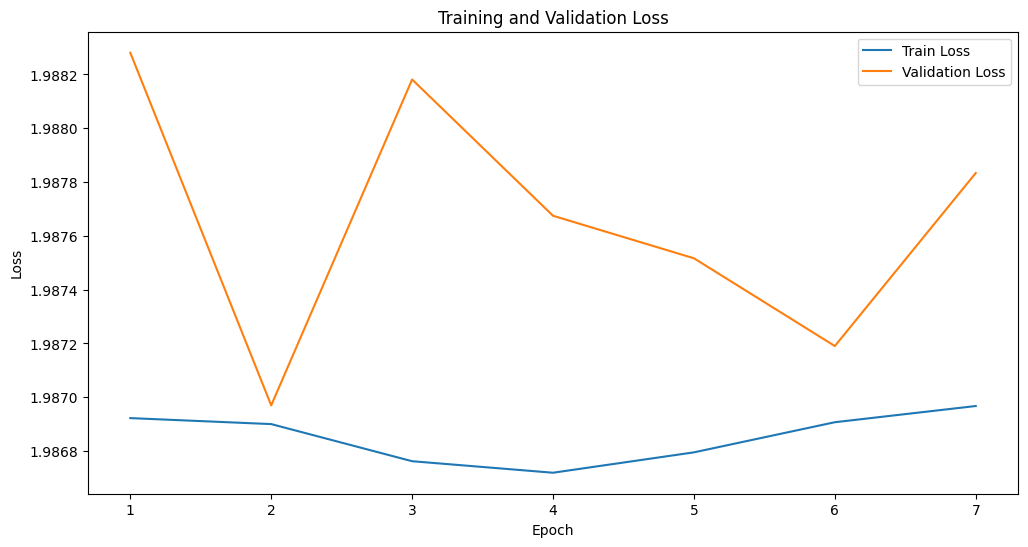

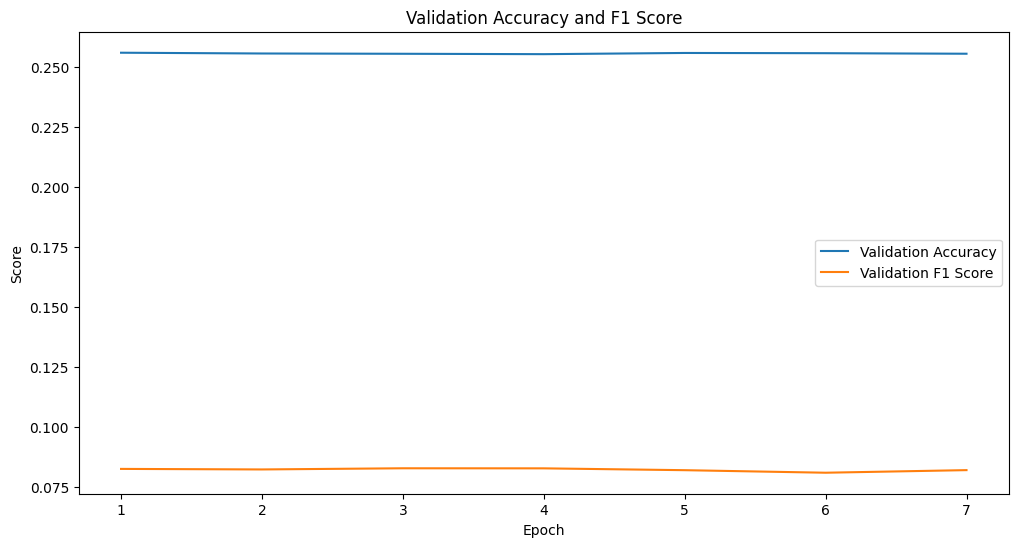

In [123]:
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs, val_accs, label="Validation Accuracy")
plt.plot(epochs, val_f1s, label="Validation F1 Score")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Accuracy and F1 Score")
plt.legend()
plt.show()